In [8]:
# Library preparation
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Base image transfering functions

# Transfering samples to gray colors
def image_to_gray(img):
    """
    Transfer given image to gray

    Parameters:
    img (ndarray): Image

    Returns: 
    ndarray: Image converted to gray scale
    """
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Transfer image to binary image
def image_to_binary(img):
    """
    Transfer given image to binary image

    Parameters:
    img (ndarray): Image

    Returns: 
    ndarray: Image converted to binary image
    """
    _, binary_img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY)
    return binary_img

# Gamma correction
def image_gamma_correction(img, c, gamma):
    """
    Add gamma correction to given image

    Parameters: 
    img (ndarray): Input image as a numpy array, where pixel values range from 0 to 255. 
    c (float): Constant multiplier, typically set to 1 for standard gamma correction. 
    gamma (float): Gamma value for the correction. Values >1 darken the image, while values <1 lighten it. 
    
    Returns: 
    ndarray: Gamma corrected image with pixel values ranging form 0 to 255.
    """
    img_corrected = c * (img / 255.0) ** gamma
    img_corrected = np.clip(img_corrected * 255.0, 0, 255).astype(np.uint8)
    return img_corrected

SyntaxError: invalid syntax (2798651333.py, line 27)

In [3]:
# Image filtering functions

# Butterworth filter
def butterworth_filter(image, cutoff, order):
    """ 
    Apply a Butterworth lowpass filter to an image. 
    
    Parameters: 
    image (ndarray): Input image. 
    cutoff (float): Cutoff frequency. 
    order (int): Order of the filter. 
    
    Returns: ndarray: Filtered image. 
    """ 
    rows, cols = image.shape 
    crow, ccol = rows // 2, cols // 2 
    
    # FFT 
    dft = fftpack.fftshift(fftpack.fft2(image)) 
    
    # Create Butterworth filter 
    u = np.arange(-ccol, ccol) 
    v = np.arange(-crow, crow) 
    U, V = np.meshgrid(u, v) 
    D = np.sqrt(U**2 + V**2) 
    H = 1 / (1 + (D / cutoff)**(2 * order)) 
    # Apply filter in frequency domain 
    dft_filtered = dft * H 
    # Inverse FFT to get the image back 
    filtered_img = np.abs(fftpack.ifft2(fftpack.ifftshift(dft_filtered)))

    return filtered_img

# Gausse filter
def gausse_filter(img, sigma):
    """
    Filter image by Gausse filration
    
    Parameters: 
    img (ndarray): Input image. 
    sigma (float): Standard deviation of the Gaussian noise. 
    
    Returns: ndarray: Image with Gausse filtration added. 
    """
    filtered_img = cv2.GaussianBlur(img, (0, 0), sigma)
    return filtered_img

# Median filter 
def median_filter(img, window):
    """
    Filter image by median filration
    
    Parameters: 
    img (ndarray): Input image. 
    window (int): window size [window x window]
    
    Returns: ndarray: Image with median filtration added. 
    """
    median_filtrated_img = cv2.medianBlur(img, window)
    return median_filtrated_img

In [4]:
# loading samples
img1 = cv2.imread('sample1.jpg')

In [55]:
# This is place to perform image processing

# image to gray
img1_gray = image_to_gray(img1)

# transfer image with gamma correction
img1_gamma1 = image_gamma_correction(img1_gray, 2, 1)
img1_gamma2 = image_gamma_correction(img1_gray, 1, 2)
img1_gamma3 = image_gamma_correction(img1_gray, 15, 10)




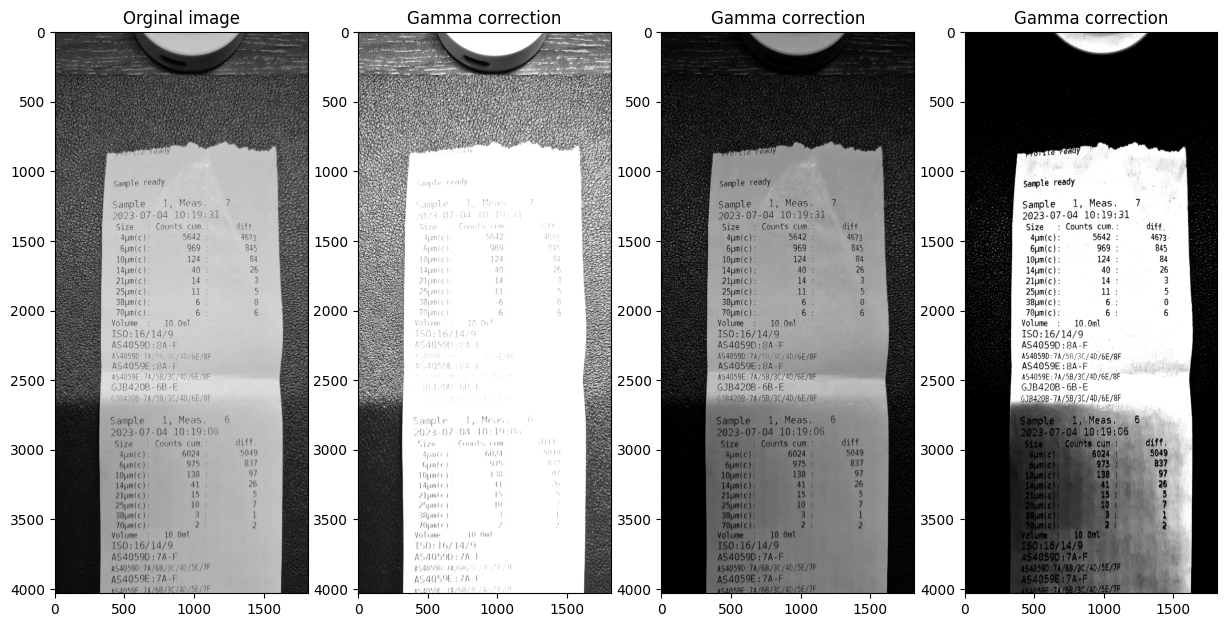

In [56]:
# Show filtered images
plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1), plt.imshow(img1_gray, cmap='gray'), plt.title('Orginal image') 
plt.subplot(1, 4, 2), plt.imshow(img1_gamma1, cmap='gray'), plt.title('Gamma correction')
plt.subplot(1, 4, 3), plt.imshow(img1_gamma2, cmap='gray'), plt.title('Gamma correction')
plt.subplot(1, 4, 4), plt.imshow(img1_gamma3, cmap='gray'), plt.title('Gamma correction')

plt.show()

In [57]:
# image to binary
img1_binary = image_to_binary(img1_gamma3)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

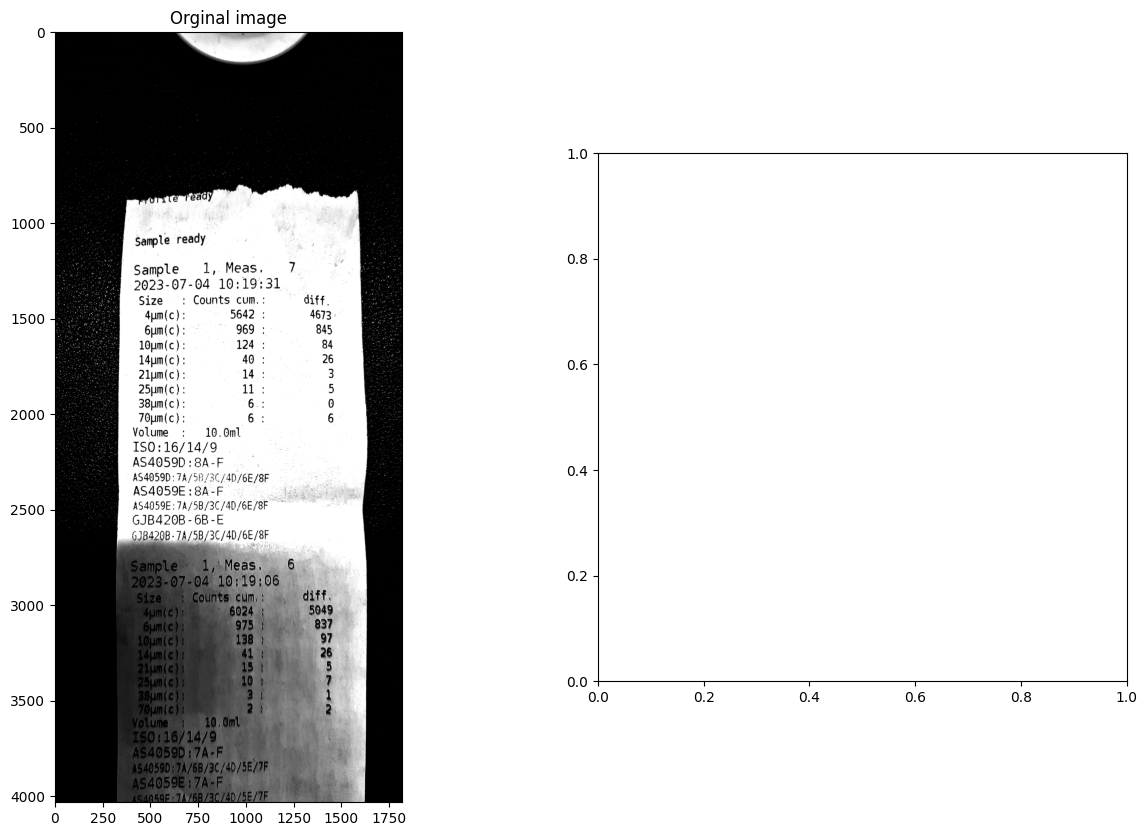

In [59]:
# Show filtered images
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1), plt.imshow(img1_gamma3, cmap='gray'), plt.title('Orginal image') 
plt.subplot(1, 2, 2), plt.imshow(img1_binary, cmap='gray'), plt.title('Gamma correction')
plt.show()

In [ ]:
# This is place to code saving processed images to files